## How to visualize the results from the search and analysis

In [2]:
# Usage example:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import os
SAVE_DIR = "Saved_files"

In [3]:
def plot_top_terms(freq_dict, ax, title, n_terms):
    terms = list(freq_dict.keys())[:n_terms]
    freqs = [freq_dict[term] for term in terms]
    
    ax.barh(terms, freqs)
    ax.set_title(title)
    ax.invert_yaxis()
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)


def plot_term_frequencies(filename, n_terms=20,save=False):
    file_prefix = filename.replace('.json', '')
    filepath=os.path.join(SAVE_DIR,filename)
    # Load frequencies
    with open(filepath, 'r', encoding='utf-8') as f:
        frequencies = json.load(f)
    
    # Plot settings
    #plt.style.use('seaborn')
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
    
    # Plot keywords
    plot_top_terms(frequencies['keywords'], ax1, f'Top {n_terms} Keywords', n_terms)
    plot_top_terms(frequencies['bigrams'], ax2, f'Top {n_terms} Bigrams', n_terms)
    plot_top_terms(frequencies['trigrams'], ax3, f'Top {n_terms} Trigrams', n_terms)
    
    plt.tight_layout()
    if save:
        output_file = os.path.join(SAVE_DIR, f"{file_prefix}_plots.png")
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        print(f"Plot saved as: {output_file}")
    plt.show()

In [4]:
def plot_frequencies(file_prefix, n_items=10, save=False):
    try:
        file_prefix = file_prefix.replace('.csv', '')
        # add the file name suffix as saved during search
        author_file = os.path.join(SAVE_DIR, f"{file_prefix}_author_frequencies.csv")
        venue_file = os.path.join(SAVE_DIR, f"{file_prefix}_venue_frequencies.csv")
        # Read data with error handling
        try:
            authors_df = pd.read_csv(author_file, sep=';', encoding='utf-8')
        except FileNotFoundError:
            print(f"Author frequency file not found: {author_file}")
            return
            
        try:
            venues_df = pd.read_csv(venue_file, sep=';', encoding='utf-8')
        except FileNotFoundError:
            print(f"Venue frequency file not found: {venue_file}")
            return
        
        # Get top n items
        top_authors = authors_df.nlargest(n_items, ['Frequency'])
        top_venues = venues_df.nlargest(n_items, ['Frequency'])
      
        # Create figure with two subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        # Plot authors
        sns.barplot(data=top_authors, x='Author', y='Frequency', ax=ax1)
        ax1.set_xticks(range(len(top_authors)))
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right',fontsize=14)
        ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=14)
        ax1.set_title(f"Top {n_items} Authors")
        ax1.set_xlabel('')
        ax1.set_ylabel('Number of Publications')
        
        # Plot venues
        sns.barplot(data=top_venues, x='Venue', y='Frequency', ax=ax2)
        ax2.set_xticks(range(len(top_venues)))
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
        ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=14)
        ax2.set_title(f"Top {n_items} Venues")
        ax2.set_xlabel('')
        ax2.set_ylabel('Number of Publications')
        
        # Adjust layout and save with matching filename
        plt.tight_layout()
        if save:
            output_file = os.path.join(SAVE_DIR, f"{file_prefix}_frequency_plots.png")
            plt.savefig(output_file, dpi=300, bbox_inches='tight')
            print(f"Plot saved as: {output_file}")
        plt.show()
        
    except Exception as e:
        print(f"Error occurred: {str(e)}")



C:\Users\STSI\AppData\Local\Temp\ipykernel_33620\752946777.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
C:\Users\STSI\AppData\Local\Temp\ipykernel_33620\752946777.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
C:\Users\STSI\AppData\Local\Temp\ipykernel_33620\752946777.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
C:\Users\STSI\AppData\Local\Temp\ipykernel_33620\752946777.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
C:\Users

Plot saved as: Saved_files\term_frequencies_2025_02_28_plots.png


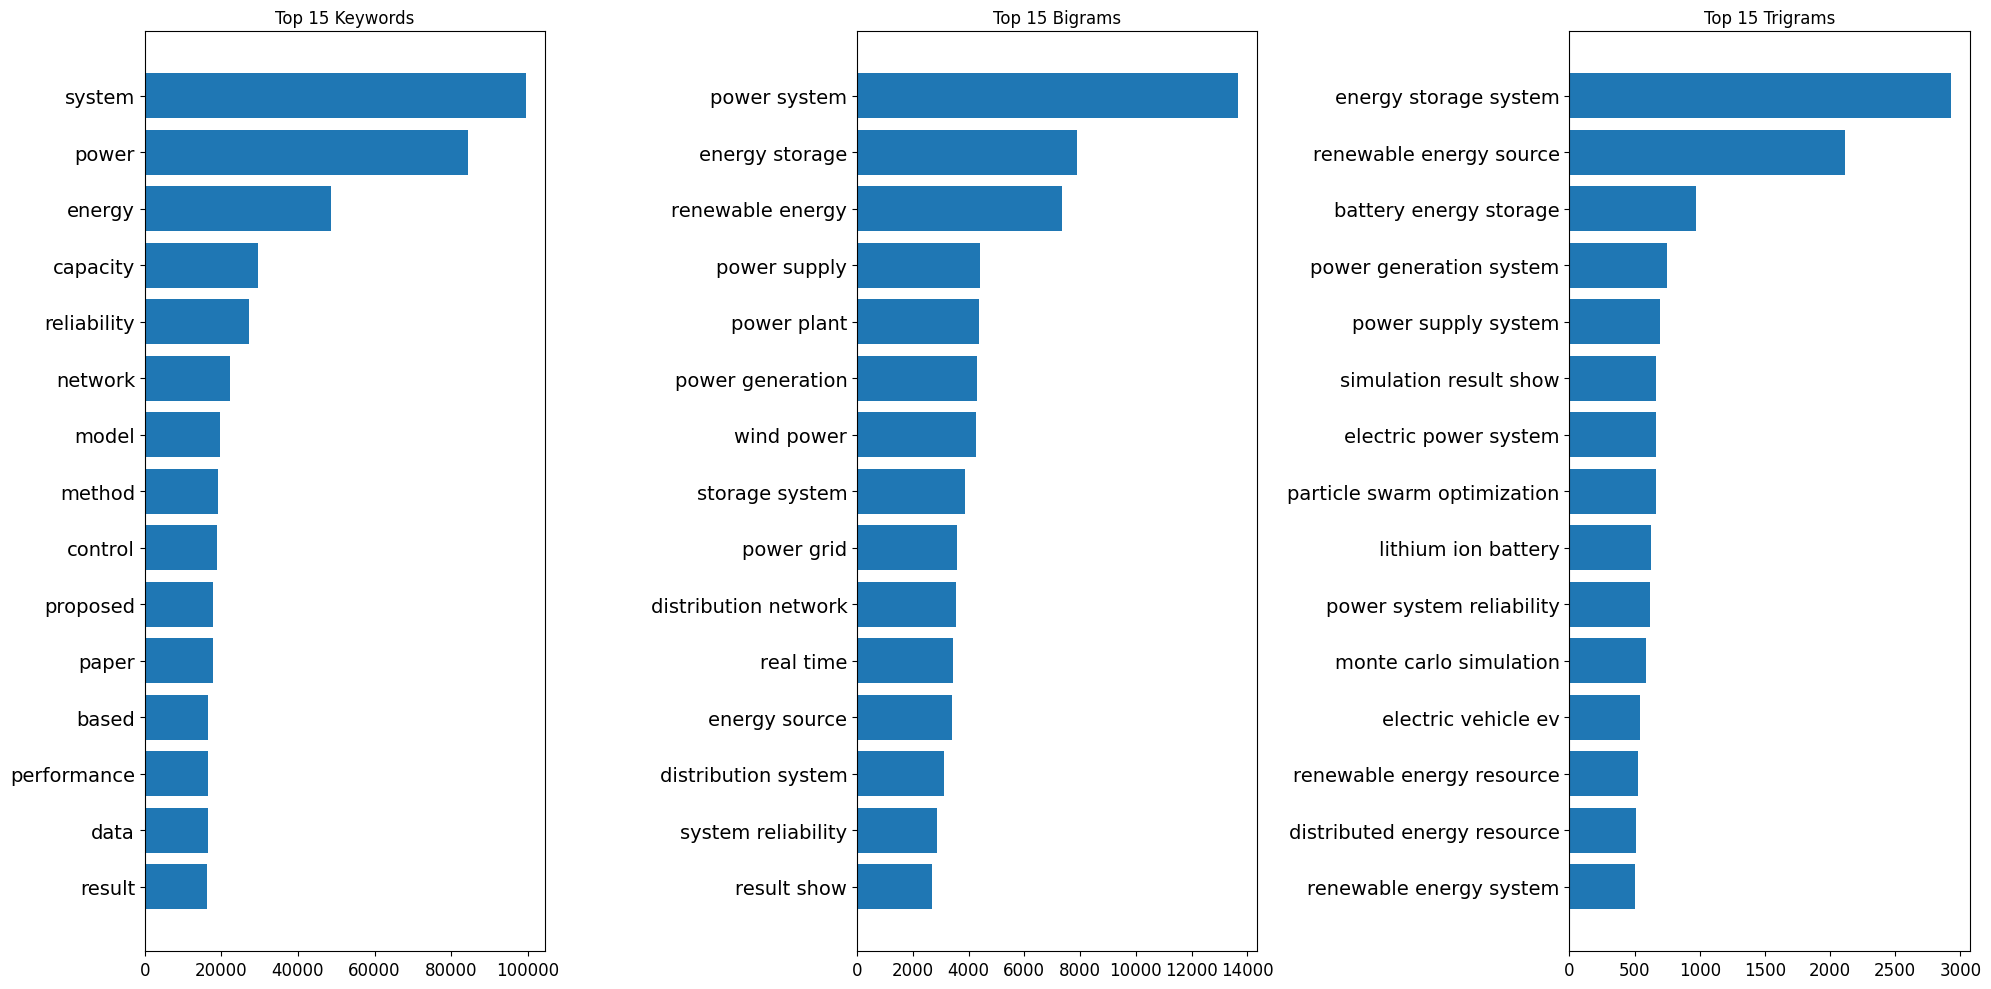

C:\Users\STSI\AppData\Local\Temp\ipykernel_33620\1397137270.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=14)
C:\Users\STSI\AppData\Local\Temp\ipykernel_33620\1397137270.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=14)


Plot saved as: Saved_files\semantic_scholar_2025_02_14_reliability_resilience_power_systems_frequency_plots.png


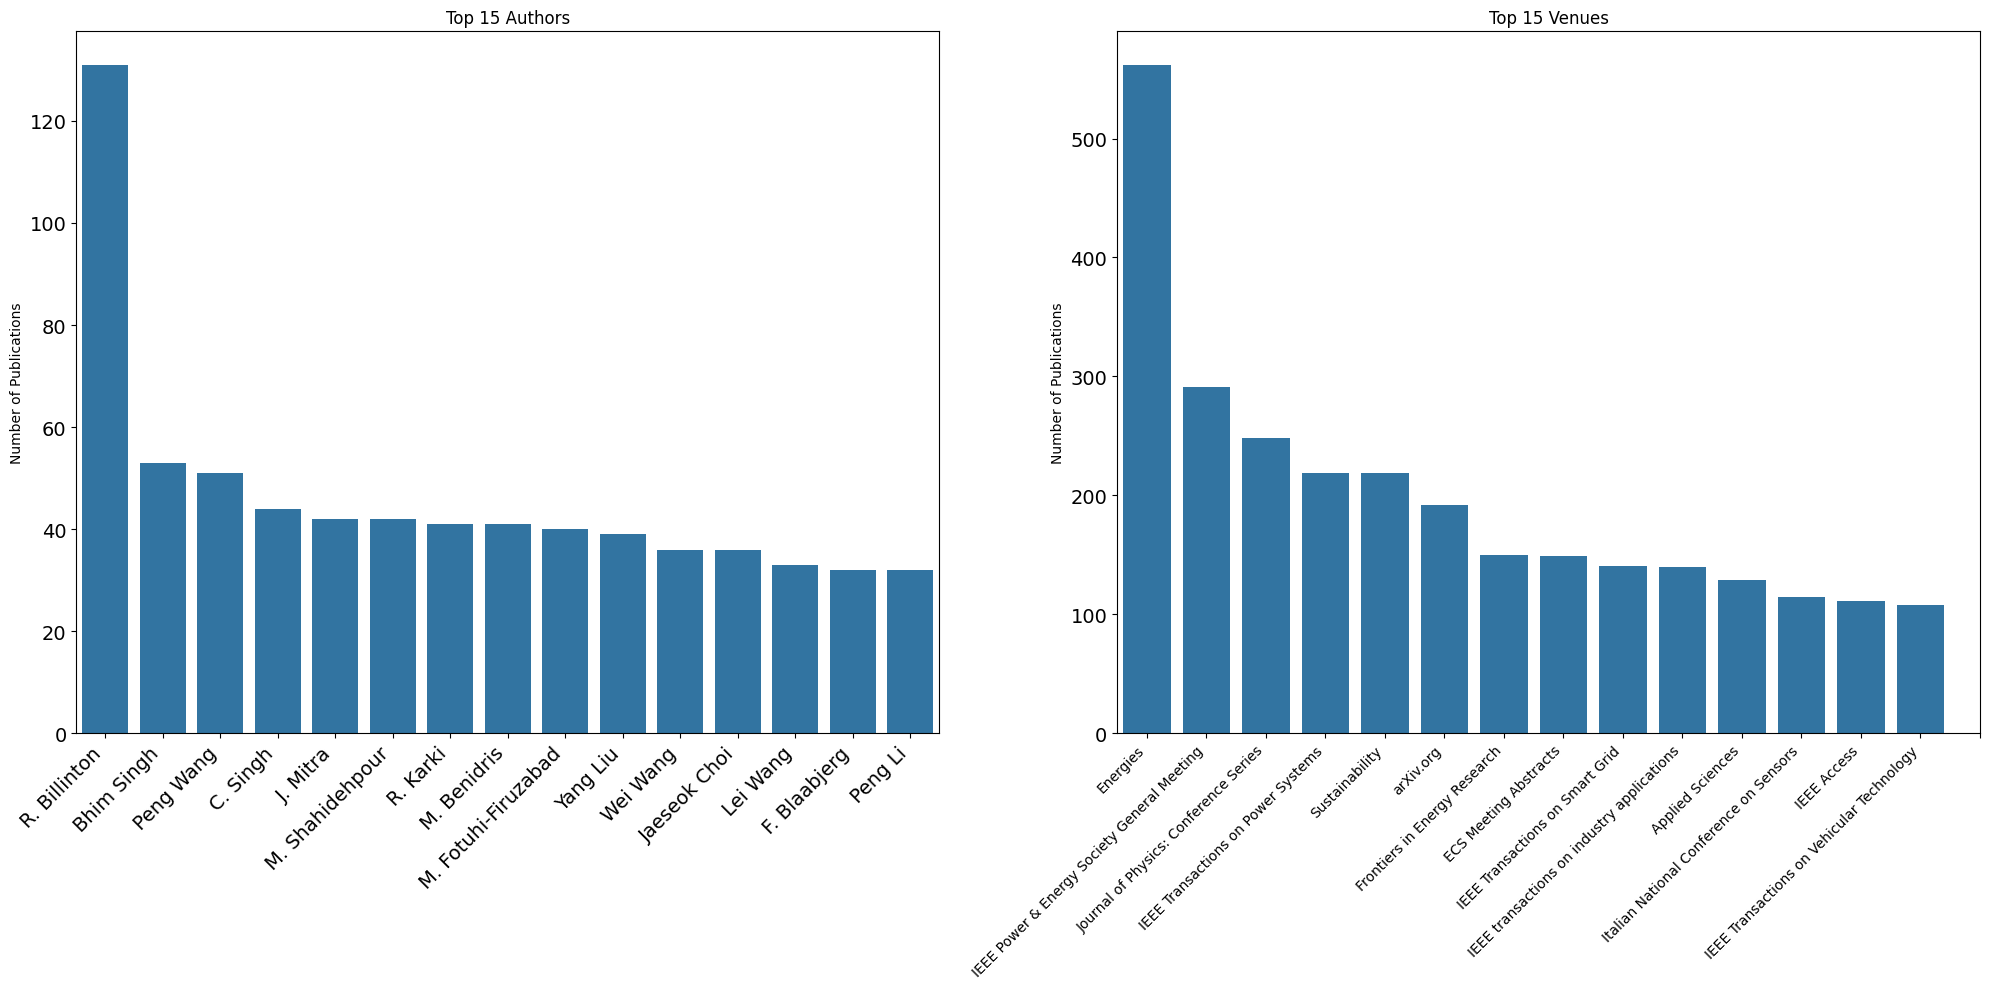

In [7]:
# plot the keyword/ngram frequency and author frequency
n=15
save=True
plot_term_frequencies('term_frequencies_2025_02_28.json',n_terms=n, save=save)
# Usage
filename = "semantic_scholar_2025_02_14_reliability_resilience_power_systems"
plot_frequencies(filename, n_items=n, save=save)


In [ ]:

def plot_topic_keywords(topic_keywords, field):
    """Plot keyword weights for each topic in a field"""
    num_topics = len(topic_keywords)
    fig, axes = plt.subplots(num_topics, 1, figsize=(12, 4*num_topics))
    
    for idx, (topic_idx, keywords) in enumerate(topic_keywords.items()):
        words, weights = zip(*keywords['word_weights'])
        ax = axes[idx] if num_topics > 1 else axes
        ax.barh(words, weights)
        ax.set_title(f'{field} - Topic {topic_idx + 1} Keywords')
        ax.invert_yaxis()
    
    plt.tight_layout()
    plt.show()

def plot_keyword_frequency(df):
    keyword_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    keyword_matrix = keyword_vectorizer.fit_transform(df['processed_text'])
    keywords = keyword_vectorizer.get_feature_names_out()
    keyword_freq = keyword_matrix.sum(axis=0).A1
    keyword_freq_dict = dict(zip(keywords, keyword_freq))
    top_keywords = sorted(keyword_freq_dict.items(), key=lambda x: x[1], reverse=True)[:20]

    plt.figure(figsize=(12, 6))
    keywords, frequencies = zip(*top_keywords)
    plt.bar(keywords, frequencies)
    plt.title('Top 20 Keywords')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
def plot_ngram_frequency(df, n=2):
    ngram_vectorizer = CountVectorizer(ngram_range=(n,n), max_df=0.95, min_df=2, stop_words='english')
    ngram_matrix = ngram_vectorizer.fit_transform(df['processed_text'])
    ngrams = ngram_vectorizer.get_feature_names_out()
    ngram_freq = ngram_matrix.sum(axis=0).A1
    ngram_freq_dict = dict(zip(ngrams, ngram_freq))
    top_ngrams = sorted(ngram_freq_dict.items(), key=lambda x: x[1], reverse=True)[:20]

    plt.figure(figsize=(12, 6))
    ngrams, frequencies = zip(*top_ngrams)
    plt.bar(ngrams, frequencies)
    plt.title(f'Top 20 {n}-grams')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()    

def plot_field_topic_comparison(df_analyzed, fields_to_analyze):
    """Plot comparison of topic distributions across fields"""
    plt.figure(figsize=(12, 6))
    
    field_counts = []
    for field in fields_to_analyze:
        # Count papers where this field is the primary topic
        count = df_analyzed[f'{field}_Primary_Topic'].notna().sum()
        field_counts.append(count)
    
    plt.bar(fields_to_analyze, field_counts)
    plt.title('Papers per Field of Study')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Papers')
    plt.tight_layout()
    plt.show()



# Plot topic distribution for a specific field
plot_topic_distribution(df_analyzed, 'Computer Science')

# Plot keyword weights for topics in a field
plot_topic_keywords(topic_keywords, 'Computer Science')

# Plot comparison across fields
plot_field_topic_comparison(df_analyzed, fields_to_analyze)


In [ ]:
# Define your fields
fields_to_analyze = ['Computer Science', 'Economics', 'Engineering', 'Physics', 'Mathematics']

# Create your visualizations using the loaded data
plot_topic_distribution(df_analyzed, 'Computer Science')
plot_field_topic_comparison(df_analyzed, fields_to_analyze)

In [ ]:
def plot_topic_distribution(df_analyzed, field, number_of_papers=20):
    """Plot topic distribution heatmap for a specific field"""
    plt.figure(figsize=(12, 6))
    
    # Get topic columns for this field
    topic_columns = [col for col in df_analyzed.columns 
                    if col.startswith(f'{field}_') and 'Topic' in col]
    
    # Create heatmap
    sns.heatmap(df_analyzed[topic_columns].iloc[:number_of_papers], 
                cmap='YlOrRd', 
                annot=False)
    plt.title(f'Topic Distribution for {field} (First {number_of_papers} Papers)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()